   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

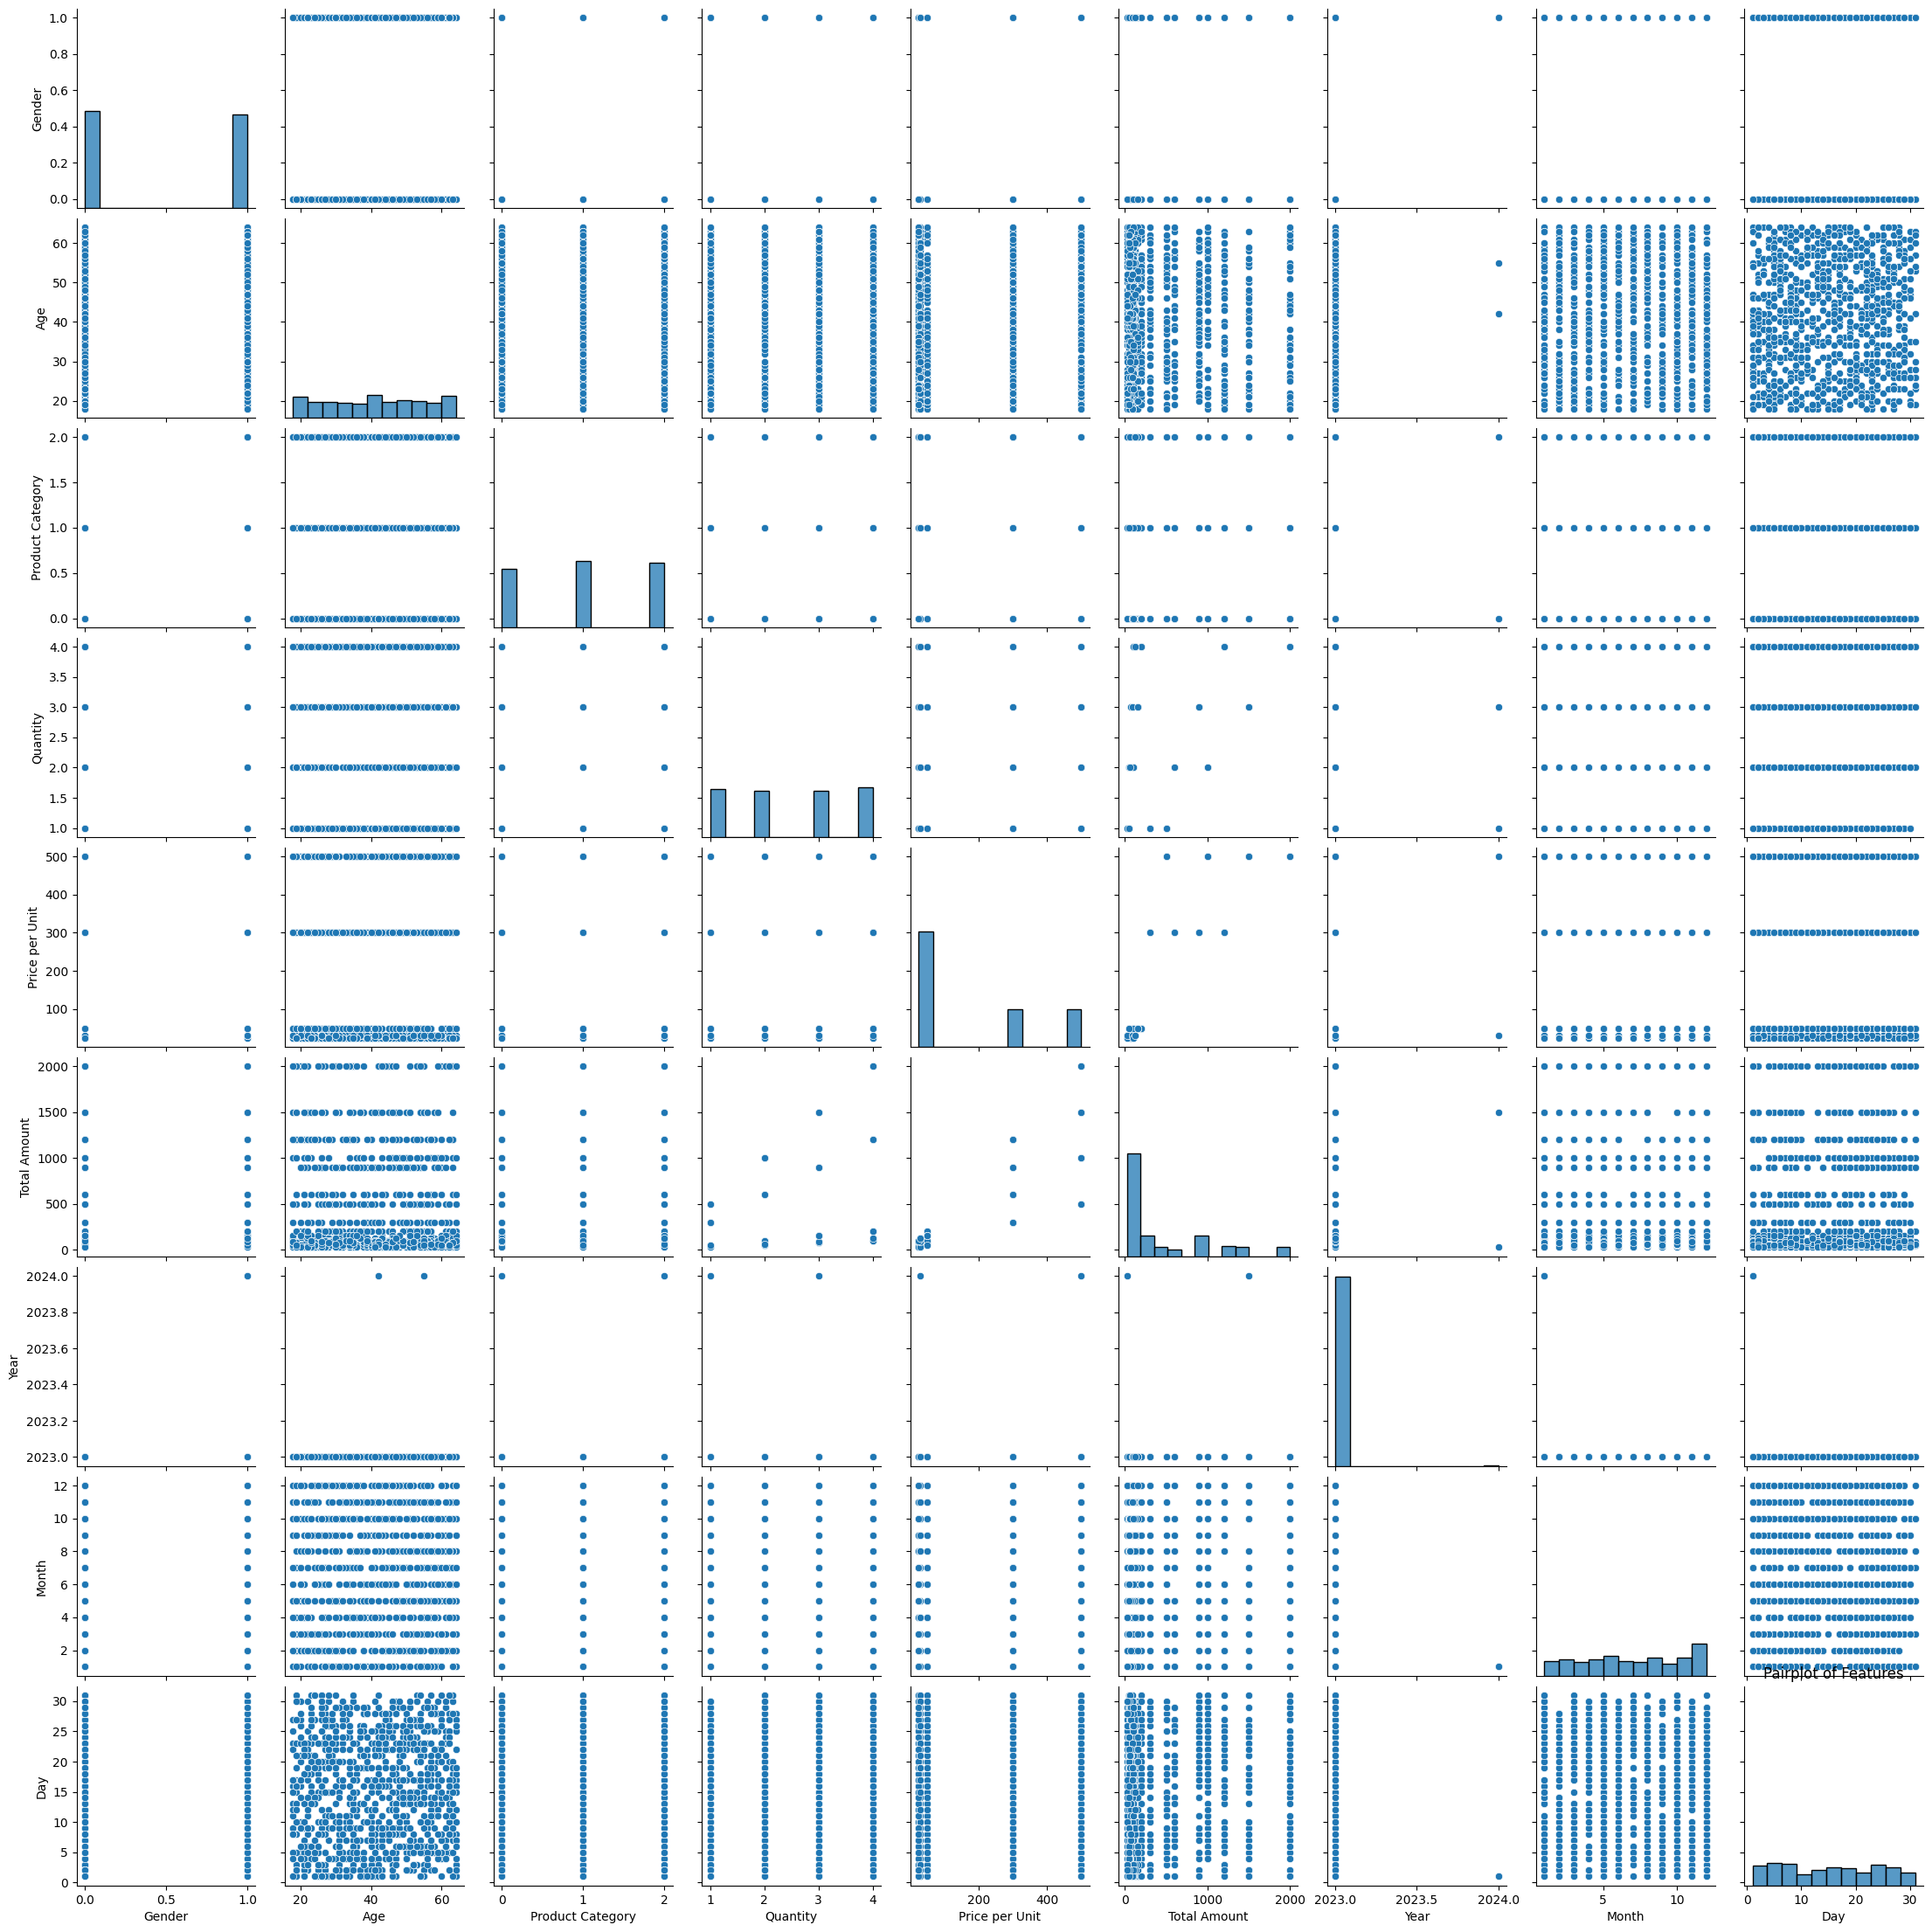

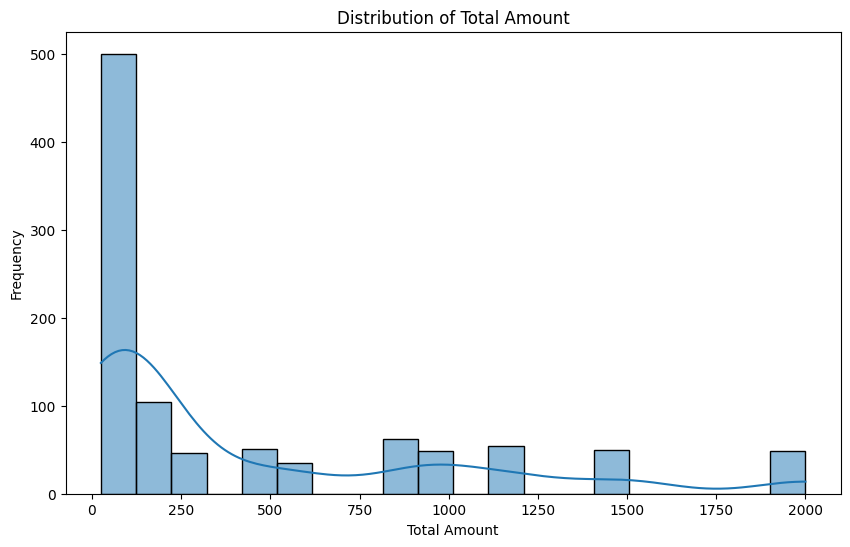

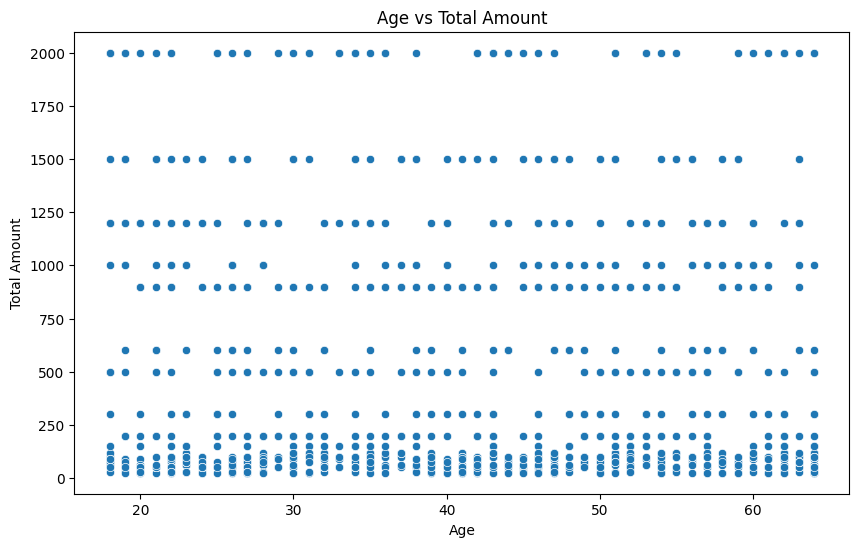

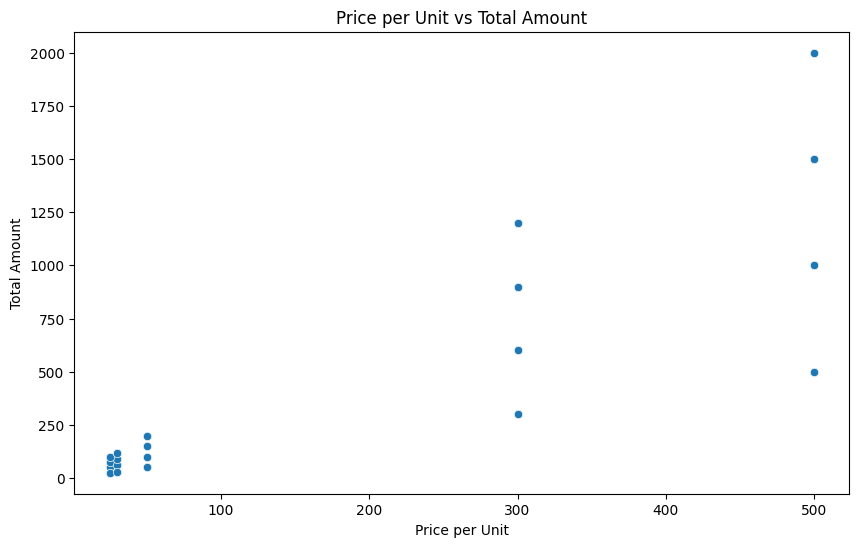

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Load the dataset
data = pd.read_csv('/content/retail_sales_dataset.csv')

# Exploratory Data Analysis (EDA)
print(data.head())
print(data.info())
print(data.describe())

# Data preprocessing
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Product Category'] = label_encoder.fit_transform(data['Product Category'])

# Feature engineering
# Extracting year, month, and day from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop unnecessary columns
data = data.drop(['Transaction ID', 'Date', 'Customer ID'], axis=1)

# Splitting the data into features and target variable
X = data.drop('Total Amount', axis=1)
y = data['Total Amount']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training using multiple algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective ='reg:squarederror', random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Print model evaluation results
for name, result in results.items():
    print(f"{name} - MSE: {result['MSE']}, R2 Score: {result['R2 Score']}")

# Data visualization
# Pairplot
sns.pairplot(data)
plt.title('Pairplot of Features')
plt.show()

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Amount'], kde=True, bins=20)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'Age' vs 'Total Amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', data=data)
plt.title('Age vs Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show()

# Scatter plot of 'Price per Unit' vs 'Total Amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Total Amount', data=data)
plt.title('Price per Unit vs Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.show()
